# HW1: Classification with Machine Learning and Deep Learning

You will build a classifier to recognize  districs based on the fishing profile. This assignment will step you through how to do this with a Neural Network mindset.

**Instructions:**
- Add you code in the cells with "## YOUR CODE HERE"

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.


<a name='1'></a>
## 1 - Mount and Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/doc/1.20/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [ ]:
### v1.2

In [2]:
#Import drive
from google.colab import drive
#Mount Google Drive
ROOT="/content/drive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("SalmonandSeaTroutNets1952-2022.csv")
You will build two algorithms, answering the following quetsions:
- Can the fishing profile of the selected columns (selected_columns) of the dataset characterize the top four districts? (Top four districts means those with more fishing records, aka more data samples (not necessarily more weight or fish caught))
- Can a simple Neural Network classify better the district with lower metrics in the first model? (This will be a binary classification, keeping the model data from the first)

The steps will hint you into the type of problem and model to apply

In [4]:
selected_columns = ['District',
'Month',
'Wild MSW number',
'Wild MSW weight (kg)',
'Wild 1SW number',
'Wild 1SW weight (kg)',
'Sea trout number',
'Sea trout weight (kg)',
'Finnock number',
'Finnock weight (kg)',
'Farmed MSW number',
'Farmed MSW weight (kg)',
'Farmed 1SW number']

# Data Description:

https://www.kaggle.com/datasets/mikhail1681/salmon-catch-statistics-for-scotland-19522022


**District**:

**District ID**: Numerical Salmon Fishery District identifier

Report order: Spatial ordering of Reporting Areas

**Region**: Salmon Fishery Region

**Method**: Fishing method

**Year**: Year of season fish were reported caught

**Month**: Month fish were reported caught

Month number: Number of month that fish were reported caught

**Wild MSW numbe**r: Number of wild multi sea-winter salmon reported caught

Wild MSW weight (kg): Weight of wild multi sea-winter salmon reported caught

**Wild 1SW number**: Number of wild one sea-winter salmon reported caught

Wild 1SW weight (kg): Weight of wild one sea-winter salmon reported caught

**Sea trout number**: Number of sea trout reported caught

Sea trout weight (kg): Weight of sea trout reported caught

**Finnock number**: Number of finnock reported caught

Finnock weight (kg): Weight of finnock reported caught

**Farmed MSW number**: Number of farmed-origin multi sea-winter salmon reported caught

Farmed MSW weight (kg): Weight of farmed-origin multi sea-winter salmon reported caught

**Farmed 1SW number**: Number of farmed-origin one sea-winter salmon reported caught

Farmed 1SW weight (kg): Weight of farmed-origin one sea-winter salmon reported caught

Netting effort: Summarised as median number of crews/traps

# Data Pre Processing: 1 pts

In [5]:
# Read the file you upload into your environment (you can download the file in OLAT): 0.5 pt
import pandas as pd
d=pd.read_csv('/content/SalmonandSeaTroutNets1952-2022.csv')

In [6]:
d

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23138,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,September,9.0,2.0,14.7,...,0.0,2.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23139,Ythan,106.0,9.0,North East,Net and Coble: Released,2022.0,August,8.0,1.0,5.0,...,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Select the columns from selected_columns and perform 1 data cleaning step: 0.5 pt

In [8]:
df_selected = d[selected_columns]


df_cleaned = df_selected.dropna()

#Data Visualization: 0.5 pts

In [9]:
# Plot an histogram for the number of records in each distric, choose the top four districts with more records.: 0.25 pts

#Use that dataset as model input (you should have only 4 districts in your dataset)

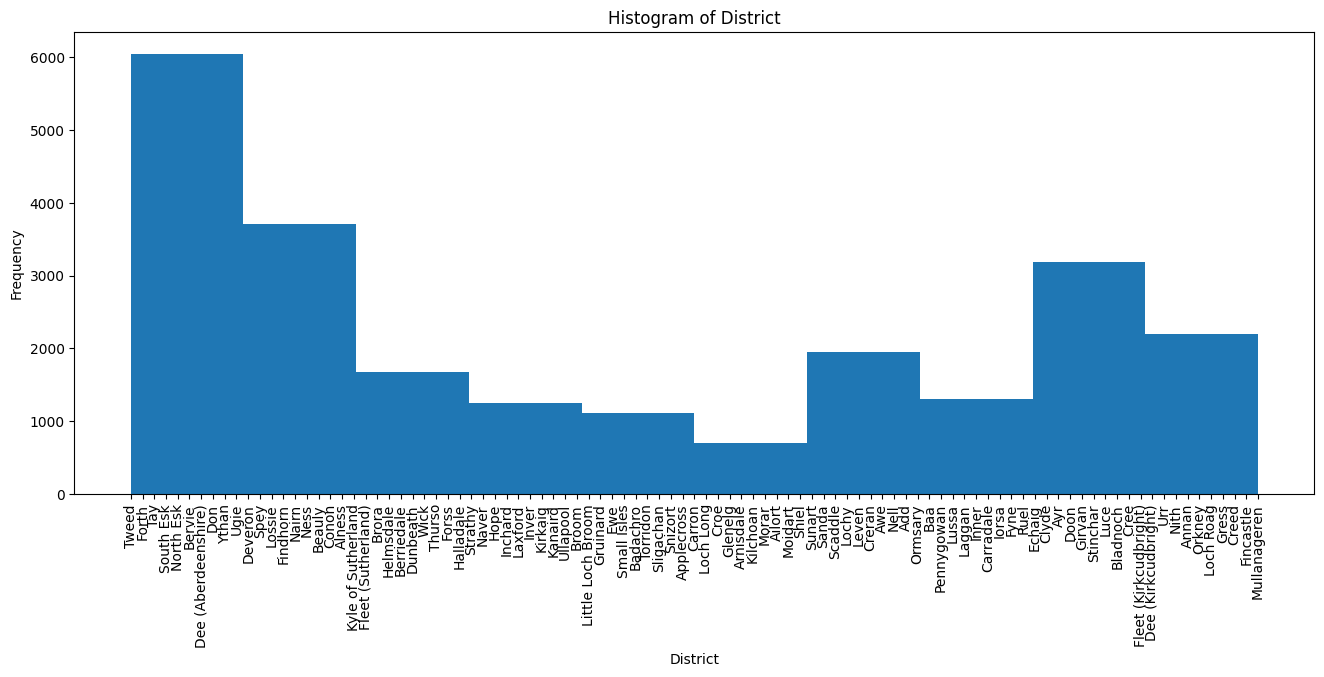

In [10]:
plt.figure(figsize=(16, 6))  # Specify the size of the figure (width, height)

plt.hist(df_cleaned['District'])
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Frequency')
plt.title('Histogram of District')
plt.show()

In [11]:
# Choose the top 4 recorded districts: 0.25 pts

In [12]:
counts=pd.DataFrame(df_cleaned.groupby('District')['Wild MSW number'].count()).reset_index()
selected_districs=counts.sort_values(by='Wild MSW number', ascending=False).head(4).District
selected_districs.values

array(['Tweed', 'North Esk', 'Nith', 'Cree'], dtype=object)

In [13]:
df_cleaned_model=df_cleaned[df_cleaned['District'].isin(selected_districs.values)]


# Modeling: 1.25 pts

In [14]:
# deal with the categorical column to be able to input the dataset into the model: 0.5 pt

In [15]:
df_dummies_model = pd.get_dummies(df_cleaned_model, columns=['Month'], drop_first=True)

In [16]:
df_dummies_model.head(3)

,District,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Month_August,Month_February,Month_July,Month_June,Month_March,Month_May,Month_November,Month_September
0,Tweed,107.0,400.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False
1,Tweed,6606.0,24856.9,0.0,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False
2,Tweed,185.0,703.1,0.0,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False


In [17]:
# Slipt test and train dataset: 0.5 pt

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies_model.drop(columns=['District']), df_dummies_model[['District']], test_size=0.2, random_state=42)


In [19]:
# Run the model chosen according to the problem at hands and Print relevant metrics: 0.25 pts

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Step 2: Choose a model (Random Forest Classifier)
model = RandomForestClassifier()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

<ipython-input-20-b96ed8474f8e>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

        Cree       0.75      0.74      0.75       132
        Nith       0.63      0.72      0.67       151
   North Esk       0.79      0.77      0.78       164
       Tweed       0.84      0.76      0.80       214

    accuracy                           0.75       661
   macro avg       0.75      0.75      0.75       661
weighted avg       0.76      0.75      0.75       661



**Expected Output**:

<table style="width:35%">
  <tr>
    <th>Class</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-score</th>
    <th>Support</th>
  </tr>
  <tr>
    <td>Cree</td>
    <td>0.73</td>
    <td>0.73</td>
    <td>0.73</td>
    <td>132</td>
  </tr>
  <tr>
    <td>Nith</td>
    <td>0.66</td>
    <td>0.73</td>
    <td>0.69</td>
    <td>151</td>
  </tr>
  <tr>
    <td>North</td>
    <td>0.78</td>
    <td>0.77</td>
    <td>0.78</td>
    <td>164</td>
  </tr>
  <tr>
    <td>Tweed</td>
    <td>0.83</td>
    <td>0.77</td>
    <td>0.80</td>
    <td>214</td>
  </tr>
</table>


# Interpretation Questions: 2 pts

1.   What is the District with the lowest false positive rate?
2.   What is the District with the highest sensivity?
3.   How is the model performing and why?

1.   What is the District with the lowest false positive rate?

Positive rate or True POsitive Rate, is the number of positives correctly classified withi the existing positive cases. The formula is= TPR/(TPR + FNR). This is the same as sensivity or recall
The answer is Nith (or Cree).

2.   What is the District with the highest sensivity?

 North (or Tweed)
3.   How is the model performing and why?

 It shows a good balanced accuracy, or F1 score, as well as precision values. The number of samples inside each class is balanced and the metrics in this very simple model implementation are arounf 70%, which leaves space for improvement.

<a name='3'></a>
## Deep Learning Model: General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish different districts based on the Salmon fishing profile.

We will use a binary problem to simplify the implementation. The problem will be distinguishing **Nith** district from all the others. *In a binary setting, 1 is Nith district, 0 is not-Nith district.*

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**: https://www.google.com/url?sa=i&url=https%3A%2F%2Fjamesmccaffrey.wordpress.com%2F2018%2F07%2F07%2Fwhy-a-neural-network-is-always-better-than-logistic-regression%2F&psig=AOvVaw2k6v5Vx9iVUZpaCuJT4zdV&ust=1711113328912000&source=images&cd=vfe&opi=89978449&ved=2ahUKEwiNjbKCuIWFAxVF7gIHHfiGDmYQjRx6BAgAEBY

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:

    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude


This is a long exercise, the goal of it is for you to follow step by step and understand every part of it (if not, bring your questions to the class). This is a guide for it, which should make its completion faster: https://dennybritz.com/posts/wildml/implementing-a-neural-network-from-scratch/

The main algorithm of deep learning is backpropagation, which will be covered in the next theoretical class. This exercise aims to prepare you for the theoretical part.


## Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### Helper functions


### Exercise 1 - sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [21]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)

    z_clipped = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_clipped))

    ### END CODE HERE ###

    return s


### Initializing parameters


### Exercise 2 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [22]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(X):
    """
    This function creates a vector of zeros of shape (1, num_features) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    weights -- initialized vector of shape (num_features, 1)
    bias -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    # Initialize parameters
    num_samples, num_features = X.shape
    weights = np.zeros(num_features).reshape(1,-1)
    bias = 0.0
    ### END CODE HERE ###

    assert(weights.shape == (1,num_features))
    assert(isinstance(bias, float) or isinstance(bias, int))

    return weights, bias

In [23]:
n_features=12
n_sample=2000
x_fake=np.zeros([n_sample,n_features])

In [24]:
x_fake.shape

(2000, 12)

In [25]:
np.zeros(12).shape


(12,)

In [26]:
np.zeros([1,12]).shape

(1, 12)

In [27]:
np.zeros(12).reshape(1,-1).shape

(1, 12)

In [28]:
np.zeros(12).reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [29]:
w,b=initialize_with_zeros(x_fake)
w.shape

(1, 12)


### Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.


### Exercise 3 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [30]:
def compute_cost( Y, y_predicted):
        #y_predicted=np.array(y_predicted, dtype=float)
        epsilon = 1e-15  # Small constant to avoid division by zero
        num_samples = len(Y)
        cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))

        return cost



In logistic regression, we model the probability \( P(Y=1|X) \), the probability of the positive class given the input features \( X \), using the logistic (sigmoid) function:

$$ \ P(Y=1|X) = \frac{1}{1 + e^{-z}} \ $$



Where $$ \ z = wX^T + b \ $$ is the linear combination of the input features \( X \) and the model parameters \( w \) (weights) and \( b \) (bias).

During training, we aim to find the parameters \( w \) and \( b \) that maximize the likelihood of the observed data. The likelihood function \( L(w, b) \) represents the probability of observing the given data under the current model parameters. For binary classification, where we have two classes (0 and 1), the likelihood function can be written as:

$$ \ L(w, b) = \prod_{i=1}^{N} (y_i \cdot P(Y=1|X_i) + (1 - y_i) \cdot (1 - P(Y=1|X_i))) \ $$

Where \( N \) is the number of samples, \( y_i \) is the actual label for the \( i \)th sample, and \( P(Y=1|X_i) \) is the predicted probability of the positive class for the \( i \)th sample.

Maximizing the likelihood function \( L(w, b) \) is equivalent to maximizing its logarithm, known as the log-likelihood function:

$$ \log L(w, b) = \sum_{i=1}^{N} (y_i \cdot \log(P(Y=1|X_i)) + (1 - y_i) \cdot \log(1 - P(Y=1|X_i))) \ $$

And if we scale the log-likelihood by \(-1/N\), we get the cross-entropy loss function:

$$ \ J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \cdot \log(P(Y=1|X_i)) + (1 - y_i) \cdot \log(1 - P(Y=1|X_i))) \ $$

So, the cross-entropy loss in logistic regression can be interpreted as the negative log-likelihood, scaled by the number of samples, and is used as the cost function to be minimized during training to find the optimal parameters \( w \) and \( b \). Therefore, the connection to likelihood is fundamental in understanding the theoretical underpinnings of the cross-entropy loss in logistic regression.

To calculate $$ \frac{\partial J}{\partial w} \ $$  (often denoted as \( dw \)) for the given logistic regression cost function:

 $$ \ J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \cdot \log(P(Y=1|X_i)) + (1 - y_i) \cdot \log(1 - P(Y=1|X_i))) \ $$

we'll use the chain rule of calculus and compute the partial derivative of \( J \) with respect to \( w \).

First, let's recall that  $$ \ P(Y=1|X) = \sigma(w^T X + b) \ $$ , where \( \sigma \) is the sigmoid function. Therefore, $$  \ P(Y=1|X_i) = \sigma(w^T X_i + b) \ $$ .

Now, applying the chain rule, we have:

 $$ \frac{\partial J}{\partial w} = -\frac{1}{N} \sum_{i=1}^{N} \frac{\partial}{\partial w} (y_i \cdot \log(\sigma(w^T X_i + b)) + (1 - y_i) \cdot \log(1 - \sigma(w^T X_i + b))) \ $$

Let's compute the partial derivatives step by step:

1. For the first term \( y_i \cdot \log(\sigma(w^T X_i + b)) \):
 $$ \frac{\partial}{\partial w} (y_i \cdot \log(\sigma(w^T X_i + b))) = y_i \cdot \frac{\sigma'(w^T X_i + b) \cdot X_i}{\sigma(w^T X_i + b)} \ $$

2. For the second term \( (1 - y_i) \cdot \log(1 - \sigma(w^T X_i + b)) \):
 $$ \frac{\partial}{\partial w} ((1 - y_i) \cdot \log(1 - \sigma(w^T X_i + b))) = (1 - y_i) \cdot \frac{-\sigma'(w^T X_i + b) \cdot X_i}{1 - \sigma(w^T X_i + b)} \ $$

Now, combining both terms, we have:

 $$ \frac{\partial J}{\partial w} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \frac{\sigma'(w^T X_i + b) \cdot X_i}{\sigma(w^T X_i + b)} - (1 - y_i) \cdot \frac{\sigma'(w^T X_i + b) \cdot X_i}{1 - \sigma(w^T X_i + b)} \right) \
 $$

 $$ \ = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \frac{\sigma'(w^T X_i + b) \cdot X_i}{\sigma(w^T X_i + b)} - (1 - y_i) \cdot \frac{\sigma'(w^T X_i + b) \cdot X_i}{1 - \sigma(w^T X_i + b)} \right) \ $$

 $$ \ = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot (1 - \sigma(w^T X_i + b)) \cdot X_i - (1 - y_i) \cdot \sigma(w^T X_i + b) \cdot X_i \right) \ $$

 $$ \ = -\frac{1}{N} \sum_{i=1}^{N} \left( (y_i - \sigma(w^T X_i + b)) \cdot X_i \right) \ $$

Therefore,  $$ \frac{\partial J}{\partial w} = -\frac{1}{N} \sum_{i=1}^{N} (y_i - \sigma(w^T X_i + b)) \cdot X_i \  $$ , which matches the formula  $$  \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T \  $$ discussed earlier, with  $$ \ A = \sigma(w^T X + b) \ $$  and \( Y \) being the true labels.

In [31]:
# GRADED FUNCTION: propagate

def propagate(weights, bias, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w --  initialized vector of shape (num_features, 1)
    b -- bias, a scalar
    X -- data of size ( number of examples,num_features )
    Y -- true "label" vector (containing 0 if non-nith, 1 if nith) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    # Assertions for dimensions
    assert X.shape[0] == Y.shape[0], "Number of samples in X and y must match"
    num_samples, num_features = X.shape

  # FORWARD PROPAGATION (FROM X TO COST)
    linear_model = np.dot(weights, X.T) + bias
    y_predicted = sigmoid(np.array(linear_model, dtype=float))

  # Compute and save cost
    cost = compute_cost(Y, y_predicted)


    # BACKWARD PROPAGATION (TO FIND GRADIENT)
    dw = (1 / num_samples) * np.dot(X.T, (y_predicted.T - Y))
    db = (1 / num_samples) * np.sum(y_predicted.T - Y)

    print(dw.shape)
    #assert(dw.shape == weights.shape)
    #assert(db.dtype == float)
    cost = np.squeeze(cost)
    #assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


### Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

### Exercise 4 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [32]:
# GRADED FUNCTION: optimize

def optimize(weights, bias, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    weights -- weights, a numpy array of size (1, num_features)
    bias -- bias, a scalar
    X -- data of shape (number of examples, num_features)
    Y -- true "label" vector (containing 0 if non-nith, 1 if nith), of shape (number of examples, 1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule


    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs_history=[]
    # Gradient descent
    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(weights,bias,X,Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = np.array(grads["dw"], dtype=float)
        db =  np.array(grads["db"], dtype=float)

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        weights = weights.T - learning_rate * dw
        bias -= learning_rate * db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs_history.append(np.mean(cost))

            # Print the cost every 100 training examples
            print ("Cost after iteration %i: %f" %(i, np.mean(cost)))

        weights=weights.T
        #print(weights.shape)

    params = {"w": weights,
                "b": bias}

    grads = {"dw": dw,
              "db": db}

    return params, grads, costs_history


### Exercise 5 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [33]:
# GRADED FUNCTION: predict

def predict(weights, bias, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    weights -- weights, a numpy array of size (num_samples, 1)
    bias -- bias, a scalar
    X -- data of size (num_samples, num_features)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    # Assertion for dimensions
    #assert X.shape[1] == len(weights), "Number of features in X must match the size of weights vector"

    linear_model = np.dot(weights, X.T) + bias
    y_predicted = sigmoid(np.array(linear_model, dtype=float))
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted[0]]

    return y_predicted_cls

<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples


## Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.


### Exercise 6 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [34]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):

    """
      Builds the logistic regression model by calling the function you've implemented previously

      Arguments:
      X_train -- training set represented by a numpy array of shape (num_samples_train, num_features)
      Y_train -- training labels represented by a numpy array (vector) of shape (num_samples_train, num_features)
      X_test -- test set represented by a numpy array of shape (num_samples_test, num_features)
      Y_test -- test labels represented by a numpy array (vector) of shape (num_samples_test, 1)
      num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
      learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()


      Returns:
      d -- dictionary containing information about the model.
    """
    Y_train=y_train
    Y_test=y_test
    num_iterations = 2000
    learning_rate = 0.5

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code)

    weights, bias = initialize_with_zeros(X_train)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs_history =  optimize(weights, bias, X_train, Y_train, num_iterations, learning_rate)

    # Retrieve parameters w and b from dictionary "parameters"
    weights = parameters["w"]
    bias = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(weights, bias, X_test)
    Y_prediction_train = predict(weights, bias, X_train)


    ### END CODE HERE ###

    # Print train/test Errors

    accuracy_test = np.mean(Y_prediction_test ==Y_test.values.reshape(1,-1))
    print("Test Accuracy:", accuracy_test)

    accuracy_train = np.mean(Y_prediction_train == Y_train.values.reshape(1,-1))
    print("Test Accuracy:", accuracy_train)

    # Plot cost over iterations
    import matplotlib.pyplot as plt
    plt.plot(range(len(costs_history)), costs_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iterations')
    plt.show()

    d = {"costs": costs_history,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : weights,
        "b" : bias,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

    return d

# Apply to your dataset

In [35]:
# replace the Nith by 1 and the remaining 3 districts by 0 in your y column (or label column): 0.05 pts

In [36]:
df_dummies_model['District'] = df_dummies_model['District'].apply(lambda x: "non-with" if x != "Nith" else x)
df_dummies_model['y'] = df_dummies_model['District'].apply(lambda x: 0 if x != "Nith" else 1)

In [37]:
df_dummies_model


,District,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,...,Farmed 1SW number,Month_August,Month_February,Month_July,Month_June,Month_March,Month_May,Month_November,Month_September,y
0,non-with,107.0,400.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,True,False,False,False,False,False,False,0
1,non-with,6606.0,24856.9,0.0,0.0,453.0,705.8,0.0,0.0,0.0,...,0.0,False,True,False,False,False,False,False,False,0
2,non-with,185.0,703.1,0.0,0.0,13.0,21.3,0.0,0.0,0.0,...,0.0,False,False,False,False,True,False,False,False,0
3,non-with,7008.0,26151.9,1.0,0.5,848.0,1172.5,0.0,0.0,0.0,...,0.0,False,False,False,False,True,False,False,False,0
4,non-with,484.0,1912.3,0.0,0.0,14.0,20.0,0.0,0.0,0.0,...,0.0,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23134,Nith,2.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,False,False,False,False,False,True,1
23135,non-with,15.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,False,False,False,False,False,False,0
23136,non-with,11.0,53.0,22.0,40.9,33.0,42.9,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,False,False,0
23137,non-with,19.0,95.4,42.0,76.3,8.0,10.4,0.0,0.0,0.0,...,0.0,True,False,False,False,False,False,False,False,0


In [43]:
df_dummies_model.to_pickle('df_dummies_model.pkl')

In [38]:
# Do a train and test split: 0.05 pts

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies_model.drop(columns=['District', 'y']), df_dummies_model[['y']], test_size=0.2, random_state=42)

In [40]:
# Run the model in your data: 1.15 pts

In [41]:
X_train

,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Month_August,Month_February,Month_July,Month_June,Month_March,Month_May,Month_November,Month_September
21955,136.0,652.7,518.0,1317.8,61.0,79.7,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False
69,5278.0,18606.4,0.0,0.0,1609.0,2047.1,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False
22016,14.0,62.9,0.0,0.0,61.0,76.2,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,True,False,False
21909,13.0,64.4,55.0,149.7,2.0,2.3,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True
19995,45.0,188.7,368.0,825.5,35.0,21.3,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,388.0,1761.3,2998.0,6799.3,965.0,656.3,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False
2865,982.0,4026.5,0.0,0.0,140.0,125.6,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False
3029,126.0,497.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False
860,127.0,645.4,5.0,15.5,613.0,1378.5,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,False,False,False


(19, 1)
Cost after iteration 0: 0.000262
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 100: 0.001869
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 200: 0.002302
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 300: 0.002338
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 400: 0.002311
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)

<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps


(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 500: 0.002182
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 600: 0.002383
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)

<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps


(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 700: 0.002122
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
Cost after iteration 800: 0.002335
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 900: 0.002188
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1000: 0.002308
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1100: 0.001491
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1200: 0.002337
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
Cost after iteration 1300: 0.001473
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1400: 0.002126
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)

<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps


(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1500: 0.002304
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)

<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps


(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1600: 0.002327
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)

<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps


(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
Cost after iteration 1700: 0.002308
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1800: 0.002121
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
Cost after iteration 1900: 0.002313
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 1)


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + eps

(19, 1)
(19, 1)
(19, 1)
Test Accuracy: 0.8184568835098336
Test Accuracy: 0.8068913290420295


<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))
<ipython-input-30-48c0d185363f>:5: RuntimeWarning: invalid value encountered in log
  cost = (-1/num_samples) * np.sum(Y.T * np.log(np.array(y_predicted, dtype=float) + epsilon) + (1 - Y).T * np.log(1 - (np.array(y_predicted, dtype=float) + epsilon)))


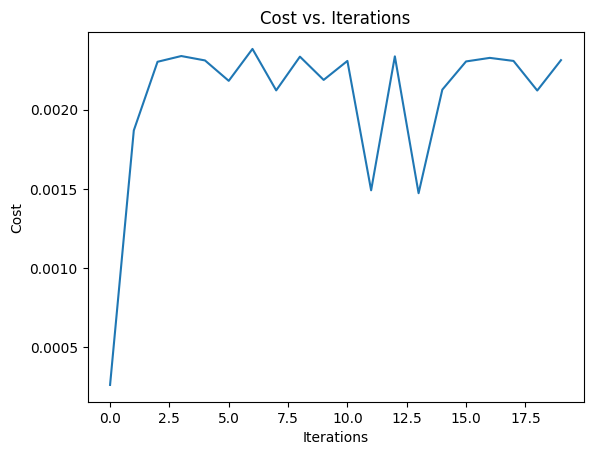

In [42]:
dict_data=model(X_train.values, y_train.values, X_test.values, y_test.values, num_iterations = 1000, learning_rate = 0.1)

